# Linear Models

## Linear Regression

### Dataset Load - extended_boston Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Extended Boston Dataset 로드
data = np.load('./datas/extended_boston_dataset.npy', allow_pickle=True)
X = data[:,:-1]
y = data[:,-1]

In [5]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y[:10])

shape of X: (506, 104)
shape of y (506,)
y: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


### Simple EDA

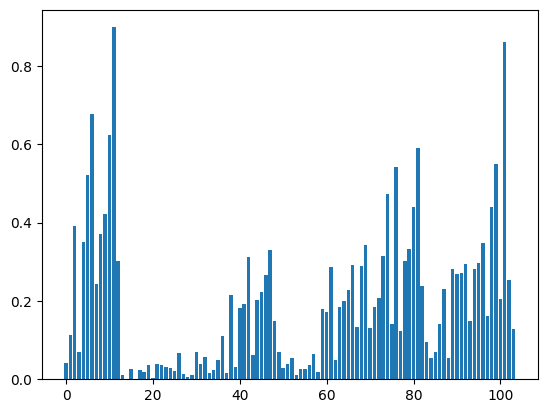

In [6]:
# X 특성들의 평균값을 막대그래프로 그려보기
plt.bar(np.arange(X.shape[1]), X.mean(axis=0))
plt.show()

### Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# 훈련/검증 데이터셋으로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state = 0)

In [9]:
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Learning

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# 선형 회귀 모델 학습
reg_linear = LinearRegression()

In [12]:
reg_linear.fit(X_train_scaled, y_train)

LinearRegression()

### Inference & Evaluation

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# 학습 데이터셋에 대한 성능 평가
y_train_hat = reg_linear.predict(X_train_scaled)
print('train MAE: %.5f'%mean_absolute_error(y_train, y_train_hat))
print('train RMSE: %.5f'%mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square: %.5f'%r2_score(y_train, y_train_hat))

train MAE: 1.56741
train RMSE: 2.02246
train R_square: 0.95205


In [15]:
# 검증 데이터셋에 대한 성능 평가
y_val_hat = reg_linear.predict(X_val_scaled)
print('val MAE: %.5f'%mean_absolute_error(y_val, y_val_hat))
print('val RMSE: %.5f'%mean_squared_error(y_val, y_val_hat)**0.5)
print('val R_square: %.5f'%r2_score(y_val, y_val_hat))

val MAE: 3.22590
val RMSE: 5.66296
val R_square: 0.60747


## Regularized Linear Regression - Ridge Regression

### Learning

In [16]:
from sklearn.linear_model import Ridge

In [17]:
# 릿지 회귀 모델 학습
reg_ridge = Ridge(alpha=1)
reg_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1)

### Inference & Evaluation

In [18]:
# 학습 데이터셋에 대한 성능 평가
y_train_hat = reg_ridge.predict(X_train_scaled)
print('train MAE: %.5f'%mean_absolute_error(y_train, y_train_hat))
print('train RMSE: %.5f'%mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square: %.5f'%r2_score(y_train, y_train_hat))

train MAE: 1.70581
train RMSE: 2.30122
train R_square: 0.93792


In [19]:
# 검증 데이터셋에 대한 성능 평가
y_val_hat = reg_ridge.predict(X_val_scaled)
print('val MAE: %.5f'%mean_absolute_error(y_val, y_val_hat))
print('val RMSE: %.5f'%mean_squared_error(y_val, y_val_hat)**0.5)
print('val R_square: %.5f'%r2_score(y_val, y_val_hat))

val MAE: 2.81779
val RMSE: 4.20133
val R_square: 0.78395


### Hyperparameter search (alpha)

In [20]:
# 릿지 회귀 모델의 alpha값에 따른 성능 평가
train_r2_list = []
val_r2_list = []

In [21]:
alpha_settings = [0, 0.1, 1, 10, 100]

In [22]:
for alpha in alpha_settings:
    reg = Ridge(alpha = alpha)
    reg.fit(X_train_scaled, y_train)

    y_train_hat = reg.predict(X_train_scaled)
    train_r2 = r2_score(y_train, y_train_hat)
    train_r2_list.append(train_r2)

    y_val_hat = reg.predict(X_val_scaled)
    val_r2 = r2_score(y_val, y_val_hat)
    val_r2_list.append(val_r2)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.77853e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [23]:
# 판다스 데이터프레임으로 결과 저장
result_df = pd.DataFrame({
        'alpha': alpha_settings,
    'train r2': train_r2_list,
    'val r2': val_r2_list
})

In [24]:
display(result_df)

,alpha,train r2,val r2
0,0.0,0.952052,0.607472
1,0.1,0.947750,0.720278
2,1.0,0.937924,0.783949
3,10.0,0.917193,0.784708
4,100.0,0.861864,0.731222


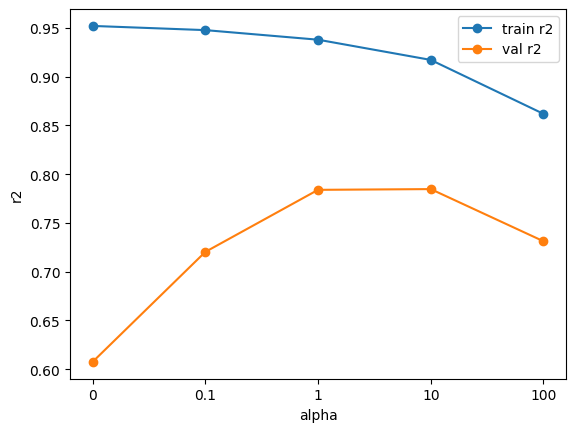

In [25]:
# alpha값에 따른 성능 변화 시각화
plt.plot(np.arange(len(alpha_settings)), train_r2_list, label='train r2', marker='o')
plt.plot(np.arange(len(alpha_settings)), val_r2_list, label='val r2', marker='o')
plt.xlabel('alpha')
plt.ylabel('r2')
plt.xticks(np.arange(len(alpha_settings)), alpha_settings)
plt.legend()
plt.show()

## Regularized Linear Regression - Lasso Regression

### Learning

In [26]:
from sklearn.linear_model import Lasso

In [27]:
# 라쏘 회귀 모델 학습
reg_lasso = Lasso(alpha=1)
reg_lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1)

### Inference & Evaluation

In [28]:
# 학습 데이터셋에 대한 성능 평가
y_train_hat = reg_lasso.predict(X_train_scaled)
print('train MAE: %.5f'%mean_absolute_error(y_train, y_train_hat))
print('train RMSE: %.5f'%mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square: %.5f'%r2_score(y_train, y_train_hat))

train MAE: 2.93553
train RMSE: 4.25648
train R_square: 0.78762


In [29]:
# 검증 데이터셋에 대한 성능 평가
y_val_hat = reg_lasso.predict(X_val_scaled)
print('val MAE: %.5f'%mean_absolute_error(y_val, y_val_hat))
print('val RMSE: %.5f'%mean_squared_error(y_val, y_val_hat)**0.5)
print('val R_square: %.5f'%r2_score(y_val, y_val_hat))

val MAE: 3.24252
val RMSE: 5.15653
val R_square: 0.67454


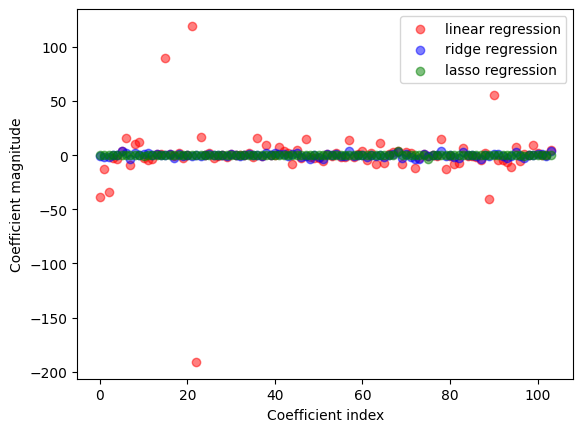

In [30]:
# 선형 회귀 모델에 따른 계수 크기 시각화
num_features = X.shape[1]
plt.scatter(np.arange(num_features), reg_linear.coef_, c ='red', alpha=0.5, label='linear regression')
plt.scatter(np.arange(num_features), reg_ridge.coef_, c ='blue', alpha=0.5, label='ridge regression')
plt.scatter(np.arange(num_features), reg_lasso.coef_, c ='green', alpha=0.5, label='lasso regression')

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.show()

### Hyperparameter search (alpha)

In [31]:
# 라쏘 회귀 모델의 alpha값에 따른 성능 평가
num_vars =[]
train_r2_list = []
val_r2_list = []

In [32]:
alpha_settings = [0.0001, 0.001, 0.01, 0.1, 1]

In [33]:
for alpha in alpha_settings:
    reg = Lasso(alpha = alpha)
    reg.fit(X_train_scaled, y_train)

    num_vars.append(sum(reg.coef_ != 0))

    y_train_hat = reg.predict(X_train_scaled)
    train_r2 = r2_score(y_train, y_train_hat)
    train_r2_list.append(train_r2)

    y_val_hat = reg.predict(X_val_scaled)
    val_r2 = r2_score(y_val, y_val_hat)
    val_r2_list.append(val_r2)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.148e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.792e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.044e+02, tolerance: 

In [34]:
# 판다스 데이터프레임으로 결과 저장
result_df = pd.DataFrame({
        'alpha': alpha_settings,
        'no. features used': num_vars,
    'train r2': train_r2_list,
    'val r2': val_r2_list
})

In [35]:
display(result_df)

,alpha,no. features used,train r2,val r2
0,0.0001,104,0.942612,0.694034
1,0.0010,100,0.942145,0.715241
2,0.0100,63,0.933517,0.781904
3,0.1000,29,0.882212,0.759644
4,1.0000,6,0.787622,0.674539


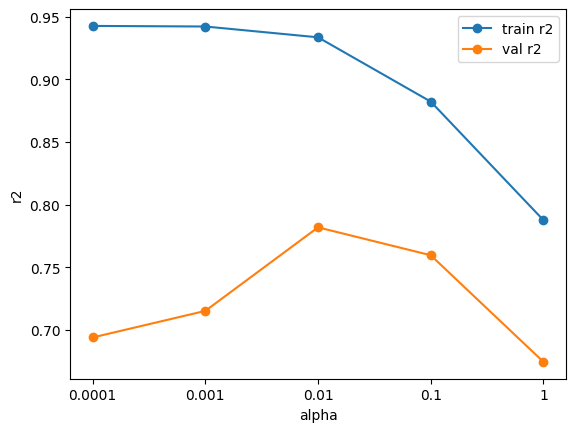

In [36]:
# alpha값에 따른 성능 변화 시각화
plt.plot(np.arange(len(alpha_settings)), train_r2_list, label='train r2', marker='o')
plt.plot(np.arange(len(alpha_settings)), val_r2_list, label='val r2', marker='o')
plt.xlabel('alpha')
plt.ylabel('r2')
plt.xticks(np.arange(len(alpha_settings)), alpha_settings)
plt.legend()
plt.show()